# Gradient Descent for a simple linear regression problem

Most of this code comes from an excelent tutorial by Josh Gordon, available in YouTube (https://www.youtube.com/watch?v=eysk3Keduxk)

It shows automatic differentiation in the context of a simple problem

### Import TensorFlow, MatPlotLib and Keras

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model

print(tf.version.VERSION)

2.10.0


### Create noisy data

In [32]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(x),), stddev=0.01)
  y = m * x + b + noise
  return x, y


In [33]:
x_train, y_train = make_noisy_data()

### Show Data points

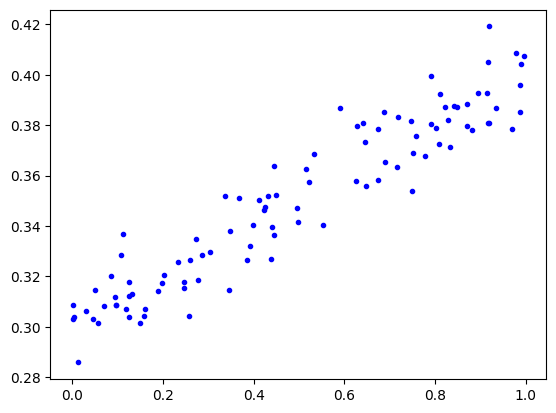

In [34]:
plt.plot(x_train, y_train, 'b.')

### Initialize m and b with random values

In [35]:
tf.random.set_seed(5)
m = tf.Variable(tf.random.uniform(shape=[]))
b = tf.Variable(tf.random.uniform(shape=[]))

print(m,b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6263931> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7017075>


### The model

In [36]:
def predict(x):
  y = m * x + b
  return y

In [37]:
print(predict(1))

tf.Tensor(1.3281006, shape=(), dtype=float32)


## What the model knows before being trained

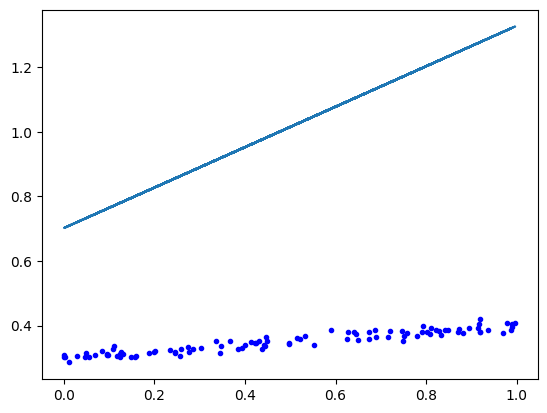

In [38]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(x_train))

### The loss function

In [39]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [40]:
loss = squared_error(predict(x_train), y_train)
print("Starting loss: ", loss.numpy())

Starting loss:  0.46392724


# Learning
Use gradient descent to gradually imporve our guess of m and b

In [41]:
learning_rate = 0.05
epochs = 200

for i in range(epochs):
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)

  gradients = tape.gradient(loss, [m, b])
  m.assign(m - gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)

  if i % 20 == 0:
    print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.463927
Step 20, Loss 0.006427
Step 40, Loss 0.003251
Step 60, Loss 0.002413
Step 80, Loss 0.001804
Step 100, Loss 0.001356
Step 120, Loss 0.001027
Step 140, Loss 0.000785
Step 160, Loss 0.000607
Step 180, Loss 0.000477


## What the model learned

In [12]:
print("m: %f, b: %f" % (m.numpy(), b.numpy()))

m: 0.167769, b: 0.263533


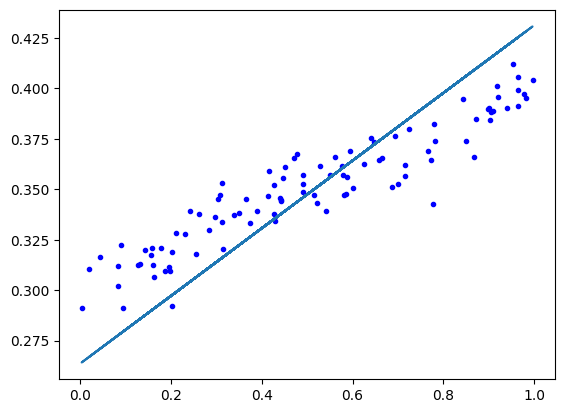

In [13]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(x_train))